## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


## Importing data

In [4]:
data=pd.read_csv("Stroke_dataset.csv")
print(data.head())

   Unnamed: 0  gender   age  hypertension  heart_disease  ever_married  \
0           0       1  67.0             0              1             1   
1           1       0  61.0             0              0             1   
2           2       1  80.0             0              1             1   
3           3       0  49.0             0              0             1   
4           4       0  79.0             1              0             1   

       work_type  Residence_type  avg_glucose_level        bmi  \
0        Private               1             228.69  36.600000   
1  Self-employed               0             202.21  28.893237   
2        Private               0             105.92  32.500000   
3        Private               1             171.23  34.400000   
4  Self-employed               0             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never s

## Basic Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 479.2+ KB


## Data Cleaning

## Empty cells

In [6]:
data.isna().sum()

Unnamed: 0           0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Check Duplicates

In [7]:
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  0


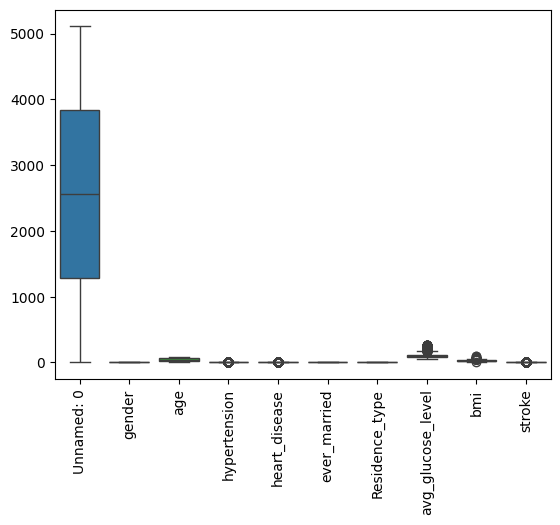

In [8]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## Drop the unnecessary column

In [11]:
data.drop(columns=["Unnamed: 0"], inplace=True)

## Encode categorical variables

In [12]:
label_encoders = {}
for col in ["work_type", "smoking_status"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

## Statistical Analysis
 

In [13]:
print(data.describe())

            gender          age  hypertension  heart_disease  ever_married  \
count  5110.000000  5110.000000   5110.000000    5110.000000   5110.000000   
mean      0.414286    43.226614      0.097456       0.054012      0.656164   
std       0.493044    22.612647      0.296607       0.226063      0.475034   
min       0.000000     0.080000      0.000000       0.000000      0.000000   
25%       0.000000    25.000000      0.000000       0.000000      0.000000   
50%       0.000000    45.000000      0.000000       0.000000      1.000000   
75%       1.000000    61.000000      0.000000       0.000000      1.000000   
max       2.000000    82.000000      1.000000       1.000000      1.000000   

         work_type  Residence_type  avg_glucose_level          bmi  \
count  5110.000000     5110.000000        5110.000000  5110.000000   
mean      2.167710        0.508023         106.147677    28.893237   
std       1.090293        0.499985          45.283560     7.698018   
min       0.00000

## Separate features and target

In [15]:
X = data.drop(columns=["stroke"])
y = data["stroke"]

## Normalize numerical columns

In [23]:
scaler = StandardScaler()
X[["age", "avg_glucose_level", "bmi"]] = scaler.fit_transform(X[["age", "avg_glucose_level", "bmi"]])

## Split into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


##  Train a Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

##  Predictions and evaluation

In [29]:
from sklearn.metrics import accuracy_score, classification_report


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.9500978473581213,
 '              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97       972\n           1       0.00      0.00      0.00        50\n\n    accuracy                           0.95      1022\n   macro avg       0.48      0.50      0.49      1022\nweighted avg       0.90      0.95      0.93      1022\n')